# Machine Learning Engineer Nanodegree
## Model Evaluation & Validation
## Project 1: Predicting Boston Housing Prices

Welcome to the first project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been written. You will need to implement additional functionality to successfully answer all of the questions for this project. Unless it is requested, do not modify any of the code that has already been included. In this template code, there are four sections which you must complete to successfully produce a prediction with your model. Each section where you will write code is preceded by a **STEP X** header with comments describing what must be done. Please read the instructions carefully!

In addition to implementing code, there will be questions that you must answer that relate to the project and your implementation. Each section where you will answer a question is preceded by a **QUESTION X** header. Be sure that you have carefully read each question and provide thorough answers in the text boxes that begin with "**Answer:**". Your project submission will be evaluated based on your answers to each of the questions.  

A description of the dataset can be found [here](https://archive.ics.uci.edu/ml/datasets/Housing), which is provided by the **UCI Machine Learning Repository**.

# Getting Started
To familiarize yourself with an iPython Notebook, **try double clicking on this cell**. You will notice that the text changes so that all the formatting is removed. This allows you to make edits to the block of text you see here. This block of text (and mostly anything that's not code) is written using [Markdown](http://daringfireball.net/projects/markdown/syntax), which is a way to format text using headers, links, italics, and many other options! Whether you're editing a Markdown text block or a code block (like the one below), you can use the keyboard shortcut **Shift + Enter** or **Shift + Return** to execute the code or text block. In this case, it will show the formatted text.

Let's start by setting up some code we will need to get the rest of the project up and running. Use the keyboard shortcut mentioned above on the following code block to execute it. Alternatively, depending on your iPython Notebook program, you can press the **Play** button in the hotbar. You'll know the code block executes successfully if the message *"Boston Housing dataset loaded successfully!"* is printed.

In [5]:
# Importing a few necessary libraries
import numpy as np
import matplotlib.pyplot as pl
from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor

# Make matplotlib show our plots inline (nicely formatted in the notebook)
%matplotlib inline

# Create our client's feature set for which we will be predicting a selling price
CLIENT_FEATURES = [[11.95, 0.00, 18.100, 0, 0.6590, 5.6090, 90.00, 1.385, 24, 680.0, 20.20, 332.09, 12.13]]

# Load the Boston Housing dataset into the city_data variable
city_data = datasets.load_boston()

# Initialize the housing prices and housing features
housing_prices = city_data.target
housing_features = city_data.data

print "Boston Housing dataset loaded successfully!"

Boston Housing dataset loaded successfully!


# Statistical Analysis and Data Exploration
In this first section of the project, you will quickly investigate a few basic statistics about the dataset you are working with. In addition, you'll look at the client's feature set in `CLIENT_FEATURES` and see how this particular sample relates to the features of the dataset. Familiarizing yourself with the data through an explorative process is a fundamental practice to help you better understand your results.

## Step 1
In the code block below, use the imported `numpy` library to calculate the requested statistics. You will need to replace each `None` you find with the appropriate `numpy` coding for the proper statistic to be printed. Be sure to execute the code block each time to test if your implementation is working successfully. The print statements will show the statistics you calculate!

In [6]:
data = np.array(city_data.data)
nR, nC = data.shape
prc = city_data.target

# Number of houses in the dataset
total_houses = nR

# Number of features in the dataset
total_features = nC

# Minimum housing value in the dataset
minimum_price = prc.min()

# Maximum housing value in the dataset
maximum_price = prc.max()

# Mean house value of the dataset
mean_price = np.mean(prc)

# Median house value of the dataset
median_price = np.median(prc)

# Standard deviation of housing values of the dataset
std_dev = np.std(prc)

# Show the calculated statistics
print "Boston Housing dataset statistics (in $1000's):\n"
print "Total number of houses:", total_houses
print "Total number of features:", total_features
print "Minimum house price:", minimum_price
print "Maximum house price:", maximum_price
print "Mean house price: {0:.3f}".format(mean_price)
print "Median house price:", median_price
print "Standard deviation of house price: {0:.3f}".format(std_dev)

Boston Housing dataset statistics (in $1000's):

Total number of houses: 506
Total number of features: 13
Minimum house price: 5.0
Maximum house price: 50.0
Mean house price: 22.533
Median house price: 21.2
Standard deviation of house price: 9.188


## Question 1
As a reminder, you can view a description of the Boston Housing dataset [here](https://archive.ics.uci.edu/ml/datasets/Housing), where you can find the different features under **Attribute Information**. The `MEDV` attribute relates to the values stored in our `housing_prices` variable, so we do not consider that a feature of the data.

*Of the features available for each data point, choose three that you feel are significant and give a brief description for each of what they measure.*

Remember, you can **double click the text box below** to add your answer!

**Answer: **

In summary, I would choose:

1. RM (average number of rooms per dwelling)

2. TAX (full-value property-tax rate per 10,000)

3. RAD (index of accessibility to radial highways)


In general, features might be 'correlated' or essentially measuring similar or dependent aspects. So, to answer the question I would start by categorizing the features. I would identify three broad classes of features.

1) Reflective of size: ZN, RM

2) Reflective of wealth/poorness:
CRIM,
INDUS,
CHAS: (although it could be noisy, the river is long),
NOX: (although it could be noisy, it depends on the decay of NOX, in addition, NOX could be reflective of city traffic, so maybe busier streets, but finanical districts could be an exception, where prices are still high despite NOX)
AGE: could be more typical for low-income dwellings
TAX,
PTRTIO: better schools, higher premium, wealthier neighborhoods
B: don't mean to be racist, but I would expect this to be an effect
LSTAT

3) Other
RAD: closer access to employment could be a factor that is relatively uncorrelated to others. In the sense that within each neighborhood streets which are closer to public transportation would be priced at a premium.
DIS: same as RAD altough probably more correlated to wealth category than RAD


To choose within each class I would also consider the following.
The statistics above indicate that the distribution is quite wide: the etremes (5 and 50) are 3+ standard deviations from the mean(*).

We can safely assume that there are large 'fat' tails. This in turns would suggest that there are diverse neighborhoods, some fairly poor others fairly wealthy (confirmed by plotting the distribution of prices which shows to be bimodal, see chart in Question 12).

Everything else being equal I would therefore choose statistics that seem to sample the tails, e.g. TAX, INDUS, B (see chart in Question 12).


In summary, with all these considerations in mind, I would choose: RM, TAX, and RAD.


(*) Given that prices should not be below 0, we cannot really infer the distance between 5 and 22.5 by looking at how many standard deviations there are, we should use a different distribution, e.g. lognormal, etc. 

Appendix

'''
    1. CRIM      per capita crime rate by town
    2. ZN        proportion of residential land zoned for lots over 
                 25,000 sq.ft.
    3. INDUS     proportion of non-retail business acres per town
    4. CHAS      Charles River dummy variable (= 1 if tract bounds 
                 river; 0 otherwise)
    5. NOX       nitric oxides concentration (parts per 10 million)
    6. RM        average number of rooms per dwelling
    7. AGE       proportion of owner-occupied units built prior to 1940
    8. DIS       weighted distances to five Boston employment centres
    9. RAD       index of accessibility to radial highways
    10. TAX      full-value property-tax rate per 10,000
    11. PTRATIO  pupil-teacher ratio by town
    12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks 
                 by town
    13. LSTAT    % lower status of the population

'''


## Question 2
*Using your client's feature set `CLIENT_FEATURES`, which values correspond with the features you've chosen above?*  
**Hint: ** Run the code block below to see the client's data.

In [7]:
print CLIENT_FEATURES

[[11.95, 0.0, 18.1, 0, 0.659, 5.609, 90.0, 1.385, 24, 680.0, 20.2, 332.09, 12.13]]


**Answer: **
TAX = 680.0, 
RM  = 5.609, 
RAD = 24

# Evaluating Model Performance
In this second section of the project, you will begin to develop the tools necessary for a model to make a prediction. Being able to accurately evaluate each model's performance through the use of these tools helps to greatly reinforce the confidence in your predictions.

## Step 2
In the code block below, you will need to implement code so that the `shuffle_split_data` function does the following:
- Randomly shuffle the input data `X` and target labels (housing values) `y`.
- Split the data into training and testing subsets, holding 30% of the data for testing.

If you use any functions not already acessible from the imported libraries above, remember to include your import statement below as well!   
Ensure that you have executed the code block once you are done. You'll know the `shuffle_split_data` function is working if the statement *"Successfully shuffled and split the data!"* is printed.

In [8]:
# Put any import statements you need for this code block here
import random

def shuffle_split_data(X, y, pct = 0.70):
    """ Shuffles and splits data into 70% training and 30% testing subsets,
        then returns the training and testing subsets. """
    
    # Shuffle
    nR, nC = X.shape
    ix = range(nR)
    random.shuffle(ix)
    iSplt = int(nR*pct)
    ix_trn= ix[:iSplt]
    ix_tst= ix[iSplt:]
    
    # Shuffle and split the data
    X_train, y_train = X[ix_trn,:], y[ix_trn]
    X_test,  y_test  = X[ix_tst,:], y[ix_tst]

    # Return the training and testing data subsets
    return X_train, y_train, X_test, y_test


# Test shuffle_split_data
try:
    X_train, y_train, X_test, y_test = shuffle_split_data(housing_features, housing_prices)
    print "Successfully shuffled and split the data!"
except:
    print "Something went wrong with shuffling and splitting the data."

Successfully shuffled and split the data!


## Question 3
*Why do we split the data into training and testing subsets for our model?*


**Answer: **

We will fit the data on the training set (in-sample) and test on the test set (out-of-sample). Otherwise we will lilkely overfit the data and possibly perform less well in predicting the price when we use CLIENT_FEATURES.

## Step 3
In the code block below, you will need to implement code so that the `performance_metric` function does the following:
- Perform a total error calculation between the true values of the `y` labels `y_true` and the predicted values of the `y` labels `y_predict`.

You will need to first choose an appropriate performance metric for this problem. See [the sklearn metrics documentation](http://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics) to view a list of available metric functions. **Hint: ** Look at the question below to see a list of the metrics that were covered in the supporting course for this project.

Once you have determined which metric you will use, remember to include the necessary import statement as well!  
Ensure that you have executed the code block once you are done. You'll know the `performance_metric` function is working if the statement *"Successfully performed a metric calculation!"* is printed.

In [9]:
# Put any import statements you need for this code block here
# from sklearn import linear_model
from sklearn import metrics

def performance_metric(y_true, y_pred, mthd='MSE'):
    """ Calculates and returns the total error between true and predicted values
        based on a performance metric chosen by the student. """
        
    if mthd=='MSE':
        error = metrics.mean_squared_error(y_true, y_pred)
    elif mthd=='MAE':
        error = metrics.mean_absolute_error(y_true, y_pred)
    else:
        print "For regressions use MSE or MAE"
        error = None
    
    return error


# Test performance_metric
try:
    total_error = performance_metric(y_train, y_train)
    print "Successfully performed a metric calculation!"
except:
    print "Something went wrong with performing a metric calculation."

Successfully performed a metric calculation!


## Question 4
*Which performance metric below did you find was most appropriate for predicting housing prices and analyzing the total error. Why?*
- *Accuracy*
- *Precision*
- *Recall*
- *F1 Score*
- *Mean Squared Error (MSE)*
- *Mean Absolute Error (MAE)*

**Answer: **
The performance metrics are quite different in nature. Accuracy, precision, recall, or F1 score are targeted towards classification problems where the classes are discrete and we want to understand if we classified correctly (yes, or no), how much false positives, and false negatives we have, etc.

In this case, we are dealing with continuous data, so the result of our analysis is not a discrete classification class, e.g. "cheap" or "expensive". We therefore use a metric that reflects the continuous nature of the data, i.e. a measure of (continuous) distance from the predicted data: either MSE or MAE. I prefer MSE because the quadratic weighting puts more weight on the outliers.

Sources
http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#examples-using-sklearn-metrics-accuracy-score


## Step 4 (Final Step)
In the code block below, you will need to implement code so that the `fit_model` function does the following:
- Create a scoring function using the same performance metric as in **Step 2**. See the [sklearn `make_scorer` documentation](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html).
- Build a GridSearchCV object using `regressor`, `parameters`, and `scoring_function`. See the [sklearn documentation on GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html).

When building the scoring function and GridSearchCV object, *be sure that you read the parameters documentation thoroughly.* It is not always the case that a default parameter for a function is the appropriate setting for the problem you are working on.

Since you are using `sklearn` functions, remember to include the necessary import statements below as well!  
Ensure that you have executed the code block once you are done. You'll know the `fit_model` function is working if the statement *"Successfully fit a model to the data!"* is printed.

In [47]:
# Put any import statements you need for this code block
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.grid_search import GridSearchCV

def fit_model(X, y):
    """ Tunes a decision tree regressor model using GridSearchCV on the input data X 
        and target labels y and returns this optimal model. """

    # Create a decision tree regressor object
    regressor = DecisionTreeRegressor()

    # Set up the parameters we wish to tune
    parameters = {'max_depth':(1,2,3,4,5,6,7,8,9,10)}

    # Make an appropriate scoring function
    scoring_function = make_scorer(mean_squared_error, greater_is_better=False)

    # Make the GridSearchCV object
    reg = GridSearchCV(regressor,parameters,scoring=scoring_function,cv=3)

    # Fit the learner to the data to obtain the optimal model with tuned parameters
    reg.fit(X, y)
    print reg.best_estimator_.get_params()['max_depth']

    # Return the optimal model
    return reg.best_estimator_


# Test fit_model on entire dataset
try:
    regv = []
    for i in range(10):
        reg = fit_model(housing_features, housing_prices)
        regv.append(reg.get_params()['max_depth'])
    print "Successfully fit a model!"
    print np.median(np.array(regv))
except:
    print "Something went wrong with fitting a model."

5
4
10
7
4
7
4
7
4
4
Successfully fit a model!
4.5


## Question 5
*What is the grid search algorithm and when is it applicable?*

**Answer: **
A search consists of:

   -) an estimator (regressor, classifier, etc.)
   -) a parameter space
   -) a method for searching or sampling candidates
   -) a cross-validation scheme, and
   -) a score function

Grid-search will scan solutions across different values of these hyper-parameters. The GridSearchCV performs a brute-force estimation of the grid, i.e. evaluates all the hyper-parameter values in the grid of points, as opposed to a random search as in RandomizedSearchCV.

It is applicable anytime we have an estimator object together with either a scoring function or a value for 'scoring'.


Sources:
http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html

and links therein

## Question 6
*What is cross-validation, and how is it performed on a model? Why would cross-validation be helpful when using grid search?*

**Answer: **
Most classifiers have some form of 'hyper-paramter', # of regressors in a linear regression, 'C' in SVM, 'max_depth' in trees, etc. These hyper-parameters are functionally distinct from the parameters of the classifier. For example, for linear regressions, the parameters are the coefficient of the regressors, whereas the # of regressors is a 'hyper-parameter'. Parameter-estimation is essentially a 'calibration' of the parameters to the data. Conditional on a specific choice of the hyper-parameter, and a specific set of training data, the parameters are determined. In some cases uniquely, when a closed form solution exists, e.g. linear regression.
There is, however, a degree of arbitrariness in terms of the choice of the 'hyper-parameter' and we would normally want to 'optimize' the hyper-parameters, which requires more data.

Ideally, we would like to partition the data into 3: training set (calculate parameters), validation set (ptimize hyper-parameters), and test set (test optimized classifier).

Cross-validation (CV) allows us to still use only two partitions of the data, while still allowing for validation. In the basic approach, called k-fold CV, the training set is split into k smaller sets. A model is trained using k-1 folds (subsets) and then validated on the remaining fold. Then the performance measure is averaged across the values computed in these loops over k.

I used a CV of 3, but also tried 2, 10 and 20 to see how the results of the optimal max_depth changed. See discussion below. I would not have a scientific justification for the various choices. I assume the larger the dataset, the larger we can set the folds in CV.


A grid-search without CV would not be robust because we would have a 'point estimate' of the score of the estimator for each value of the parameter and that in itself could be noisy. Thus, basing our inference on a grid search without CV, we could infer that a hyper-parameter value is better than another one just based on noise. Using CV we will re-sample several times so that we will obtain a better estimate of the score for a given value of the hyper-parameter.


# Checkpoint!
You have now successfully completed your last code implementation section. Pat yourself on the back! All of your functions written above will be executed in the remaining sections below, and questions will be asked about various results for you to analyze. To prepare the **Analysis** and **Prediction** sections, you will need to intialize the two functions below. Remember, there's no need to implement any more code, so sit back and execute the code blocks! Some code comments are provided if you find yourself interested in the functionality.

In [18]:
def learning_curves(X_train, y_train, X_test, y_test):
    """ Calculates the performance of several models with varying sizes of training data.
        The learning and testing error rates for each model are then plotted. """
    
    print "Creating learning curve graphs for max_depths of 1, 3, 6, and 10. . ."
    
    # Create the figure window
    fig = pl.figure(figsize=(10,8))

    # We will vary the training set size so that we have 50 different sizes
    sizes = np.rint(np.linspace(1, len(X_train), 50)).astype(int)
    train_err = np.zeros(len(sizes))
    test_err = np.zeros(len(sizes))

    # Create four different models based on max_depth
    for k, depth in enumerate([1,3,6,10]):
        
        for i, s in enumerate(sizes):
            
            # Setup a decision tree regressor so that it learns a tree with max_depth = depth
            regressor = DecisionTreeRegressor(max_depth = depth)
            
            # Fit the learner to the training data
            regressor.fit(X_train[:s], y_train[:s])

            # Find the performance on the training set
            train_err[i] = performance_metric(y_train[:s], regressor.predict(X_train[:s]))
            
            # Find the performance on the testing set
            test_err[i] = performance_metric(y_test, regressor.predict(X_test))

        # Subplot the learning curve graph
        ax = fig.add_subplot(2, 2, k+1)
        ax.plot(sizes, test_err, lw = 2, label = 'Testing Error')
        ax.plot(sizes, train_err, lw = 2, label = 'Training Error')
        ax.legend()
        ax.set_title('max_depth = %s'%(depth))
        ax.set_xlabel('Number of Data Points in Training Set')
        ax.set_ylabel('Total Error')
        ax.set_xlim([0, len(X_train)])
    
    # Visual aesthetics
    fig.suptitle('Decision Tree Regressor Learning Performances', fontsize=18, y=1.03)
    fig.tight_layout()
    fig.show()

In [19]:
def model_complexity(X_train, y_train, X_test, y_test):
    """ Calculates the performance of the model as model complexity increases.
        The learning and testing errors rates are then plotted. """
    
    print "Creating a model complexity graph. . . "

    # We will vary the max_depth of a decision tree model from 1 to 14
    max_depth = np.arange(1, 14)
    train_err = np.zeros(len(max_depth))
    test_err = np.zeros(len(max_depth))

    for i, d in enumerate(max_depth):
        # Setup a Decision Tree Regressor so that it learns a tree with depth d
        regressor = DecisionTreeRegressor(max_depth = d)

        # Fit the learner to the training data
        regressor.fit(X_train, y_train)

        # Find the performance on the training set
        train_err[i] = performance_metric(y_train, regressor.predict(X_train))

        # Find the performance on the testing set
        test_err[i] = performance_metric(y_test, regressor.predict(X_test))

    # Plot the model complexity graph
    pl.figure(figsize=(7, 5))
    pl.title('Decision Tree Regressor Complexity Performance')
    pl.plot(max_depth, test_err, lw=2, label = 'Testing Error')
    pl.plot(max_depth, train_err, lw=2, label = 'Training Error')
    pl.legend()
    pl.xlabel('Maximum Depth')
    pl.ylabel('Total Error')
    pl.show()

# Analyzing Model Performance
In this third section of the project, you'll take a look at several models' learning and testing error rates on various subsets of training data. Additionally, you'll investigate one particular algorithm with an increasing `max_depth` parameter on the full training set to observe how model complexity affects learning and testing errors. Graphing your model's performance based on varying criteria can be beneficial in the analysis process, such as visualizing behavior that may not have been apparent from the results alone.

Creating learning curve graphs for max_depths of 1, 3, 6, and 10. . .


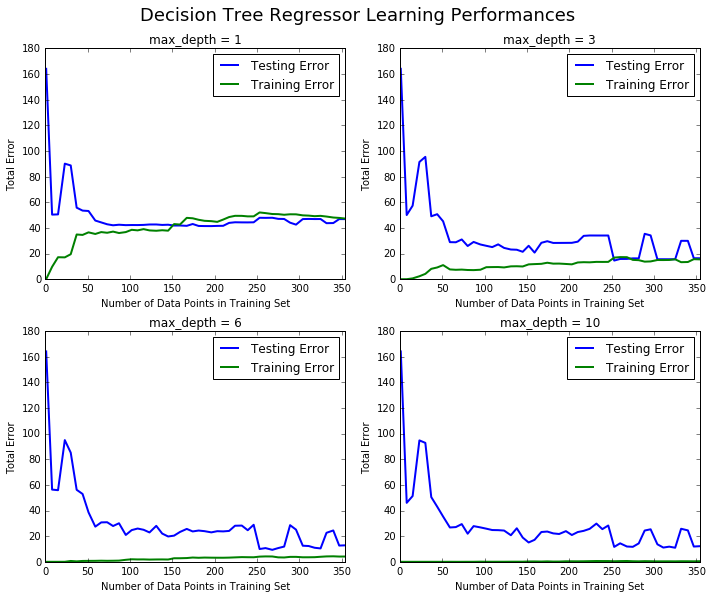

In [22]:
learning_curves(X_train, y_train, X_test, y_test)

## Question 7
*Choose one of the learning curve graphs that are created above. What is the max depth for the chosen model? As the size of the training set increases, what happens to the training error? What happens to the testing error?*

**Answer: **
The top right subplot has a max_depth=3. As the size of the training set increases, the training error increases, whereas the testing error decreases. To be more speecific, however, the behavior or both testing and training errors have two 'regimes': for a low number of data points 120-170 (depending on max_depth) the total error estimates fluctuate a lot although they are on a downward trend. After that point, say in the 200+ datapoints, the total error estimates start leveling off. This should be an indication that the algorithm has learned the pattern. Subsequent fluctuations are more noise than anything more structural. 

## Question 8
*Look at the learning curve graphs for the model with a max depth of 1 and a max depth of 10. When the model is using the full training set, does it suffer from high bias or high variance when the max depth is 1? What about when the max depth is 10?*

**Answer: **
High bias is an indication of underfitting, whereas high variance an indication of overfitting.
Max_depth = 1 might be underfitting (high bias), wheras max_depth = 10 might be overfitting (high variance).
With max_depth = 1 both the testing error and the training error converge to a high value compared to other max_depth values. The error convergence seems a bit faster than for otehr max_depth values. Importantly, the testing error and the training error converge to similar values. Assuming that the total error in the loss function is not scaled by the number of data points in the data set, we should expect the training set to converge to a lower number if the size of the training set and testing set are relatively comparable. The other graphs clearly indicate that with higher max_depth the training error can be pushed to almost zero.
With max_depth = 10 there is a large difference between the total error of the training set and the test set. If the error is normalized or the the training and test set are of comparable size the two errors should converge to similar numbers. The error for the training set converging to almost zero indicates overfitting to the data. In principle, if the classifier has enough parameters to fit exactly all the data points the total error would be exactly zero.

Creating a model complexity graph. . . 


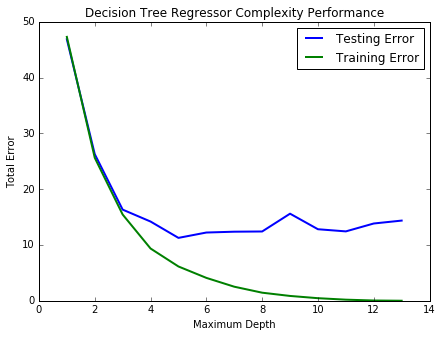

In [23]:
model_complexity(X_train, y_train, X_test, y_test)

## Question 9
*From the model complexity graph above, describe the training and testing errors as the max depth increases. Based on your interpretation of the graph, which max depth results in a model that best generalizes the dataset? Why?*

**Answer: **
As max_depth increases, the total training set error decays to almost zero, monotonically. That makes sense because as we increase the complexity of the classifier (e.g. number of degrees of freedom or fitting parameters), we fit the data better and better up until we fit it almost perfectly (total training error almost zero).
The total testing seterror starts at a value of about 39 and then it converges to an average value of about 25, by the time max_depth=3 or 4. This indicates that despite the classifier fitting the test set better, it does not generalize much better, beyond max_depth = 4. Indeed the testing error does not decrease below a certain band of 23 to 27, let me call this a 'long-term' error band.
Given this, I would pick either max_depth=3 or 4. In principle, I would tend to be more parsimonious and pick 3 but given the still decent improvement in training error between 3 and 4, I would finally pick 4. In addition, with max_depth = 4, the test error is closer to the 'long-term' mean of the test error band, which would also suggest picking max_depth = 4.


# Model Prediction
In this final section of the project, you will make a prediction on the client's feature set using an optimized model from `fit_model`. When applying grid search along with cross-validation to optimize your model, it would typically be performed and validated on a training set and subsequently evaluated on a **dedicated test set**. In this project, the optimization below is performed on the *entire dataset* (as opposed to the training set you made above) due to the many outliers in the data. Using the entire dataset for training provides for a less volatile prediction at the expense of not testing your model's performance. 

*To answer the following questions, it is recommended that you run the code blocks several times and use the median or mean value of the results.*

## Question 10
*Using grid search on the entire dataset, what is the optimal `max_depth` parameter for your model? How does this result compare to your intial intuition?*  
**Hint: ** Run the code block below to see the max depth produced by your optimized model.

In [48]:
print "Final model has an optimal max_depth parameter of", reg.get_params()['max_depth']

Final model has an optimal max_depth parameter of 4


**Answer: **
Using grid search the max_depth parameter varies as indicated in the previous section. I ran 10 cases and the median is 4.5. This matches the intuition developed above.


## Question 11
*With your parameter-tuned model, what is the best selling price for your client's home? How does this selling price compare to the basic statistics you calculated on the dataset?*  

**Hint: ** Run the code block below to have your parameter-tuned model make a prediction on the client's home.

Predicted value of client's home: 21.630


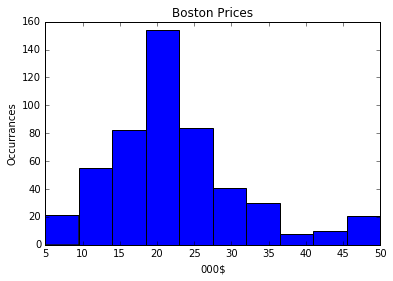

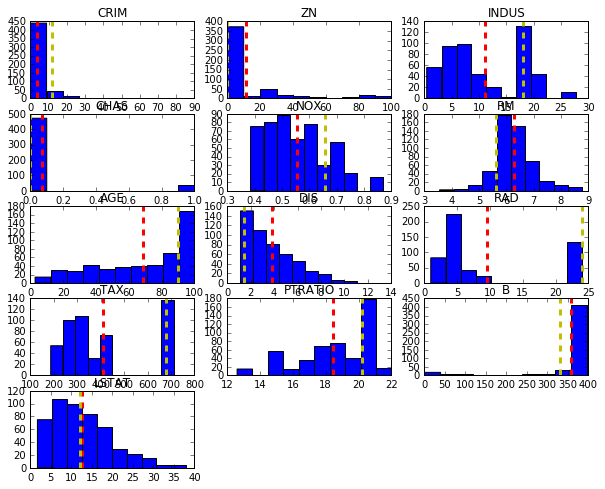

In [49]:
sale_price = reg.predict(CLIENT_FEATURES)
print "Predicted value of client's home: {0:.3f}".format(sale_price[0])

# Additional code

# Histogram of prices
pl.hist(prc)
pl.title("Boston Prices")
pl.xlabel("000$")
pl.ylabel("Occurrances")

# Histogram of features
feat_s = city_data.feature_names
fig = pl.figure(figsize=(10,8))
for i,f in enumerate(feat_s):
    ax = fig.add_subplot(5, 3, i+1)
    ax.hist(data[:,i])
    ax.axvline(np.mean(data[:,i]), color='r', linestyle='--', linewidth=3)
    ax.axvline(CLIENT_FEATURES[0][i], color='y', linestyle='--', linewidth=3)
    ax.set_title(f)


**Answer: **
The predicted price would be 21,630, which is quite close to the median of roughly 21,200.

## Question 12 (Final Question):
*In a few sentences, discuss whether you would use this model or not to predict the selling price of future clients' homes in the Greater Boston area.*

**Answer: **
The methodology seems consistent.

That said, I have two concerns.

1) I included a chart above that shows the histograms of features. I also overlaid the mean (red line) and the client data (yellow line). I see that some of the CLIENT_FEATURES are at the extreme of the data ranges, e.g. RAD, TAX, AGE, PTRATIO. As such, I am not very confident that the classifier generalized enough in part of the 'data space' where data is either extreme and/or scarse. This is also concerning because if my intuition on the 3 relevant factors were right (TAX, RM, and RAD) then for 2 out of those 3 client data points would be at extreme values compared to the data sets.

2) I estimated a decision tree with max_depth = 4. If I use the training set I would predict a value of 50,000. If I use the all the data I get a value of 21,630. This does not give me great confidence that the classifier is properly generalizing.

The above concerns would warrant a bit more analysis. To keep it short, I would try: i) understand better if the data point is particularly unusual (are there other data points somewhat 'close' to the one in question? For example the client property has high TAX and high B, does that happen more often, is it an anomaly?), ii) more work on the features to reduce redundancy, if present; iii) try different types of classifiers.

